# Book reviews and recommendations

In this notebok we will attempt to gain insights into the popularity of books found on [GoodReads](https://www.goodreads.com/).

Information about books can be used in a variety of ways. It can give you both quantitative and qualitative info.
For example, you can get the number of Russian authors who have written more than 5 books (quantitative) or you can get the popularity of a book across many languages (qualitative).

At the outset we will define the goals.

* Answer simple questions.
* Answer deep questions.
* and some fun stuff!

The dataset used for the purposes of this project is the [Goodreads-books dataset](https://www.kaggle.com/jealousleopard/goodreadsbooks).

First, we will import the essential pandas library.

In [1]:
import pandas as pd

Now we will read the dataset. Note that we have used 'bookID' as the index for the dataset. How did we do this even before examining the dataset? The answer is that the data description given in the link for the dataset (see above) clearly states that this particular column has a unique value for each book, which is perfect for use as an index into the dataset.

The error_bad_lines argument needs to be set to False (default value is True) in order to ignore rows with too many columns. If this argument is not set to False, read_csv will return an error saying it encountered a row with 11 columns, when infact most the data have only 10 columns.

In [2]:
books_data = pd.read_csv('../input/goodreadsbooks/books.csv', error_bad_lines = False, index_col = 'bookID')

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [3]:
books_data.head()

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


Let's do a quick check to see if there are any missing values.

In [4]:
books_data.isna().sum().sum()

0

Good, so there are no missing values.

# Answering simple questions.

In this section we will answer the following questions.
1. How many unique authors are there?
2. Which are the top 10 most frequently occurring authors?
3. How is the distribution of number of pages in each book in the dataset?
4. Which are some of the books with many ratings?
5. Which are some of the highly rated books?
5. Which authors are the most popular?

In [5]:
# Answer to question 1
num_unique_authors = books_data['authors'].nunique()
print('Number of authors = ', num_unique_authors)

Number of authors =  7600


In [6]:
# Answer to question 2
# frequency of top 10 frequent authors
books_data['authors'].value_counts()[:10]

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Sandra Brown                   31
Name: authors, dtype: int64

3. How is the distribution of number of pages in each book in the dataset?

In order to answer the third question, we need some visualization. Let's import the plotting essentials.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

Text(0.5, 1.0, 'Distribution of number of pages')

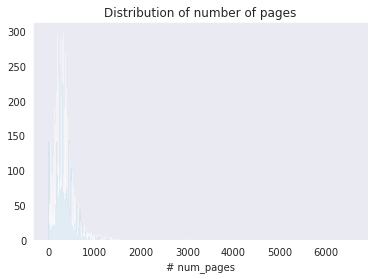

In [8]:
# Answer to question 3
sns.distplot(a = books_data['# num_pages'], kde = False, bins = 2000)
plt.title('Distribution of number of pages')

Looks like on average, around 500 pages can be found in majority of the books in the dataset. The number of books having >1000 pages is very small.

4. Which are some of the books with many ratings?

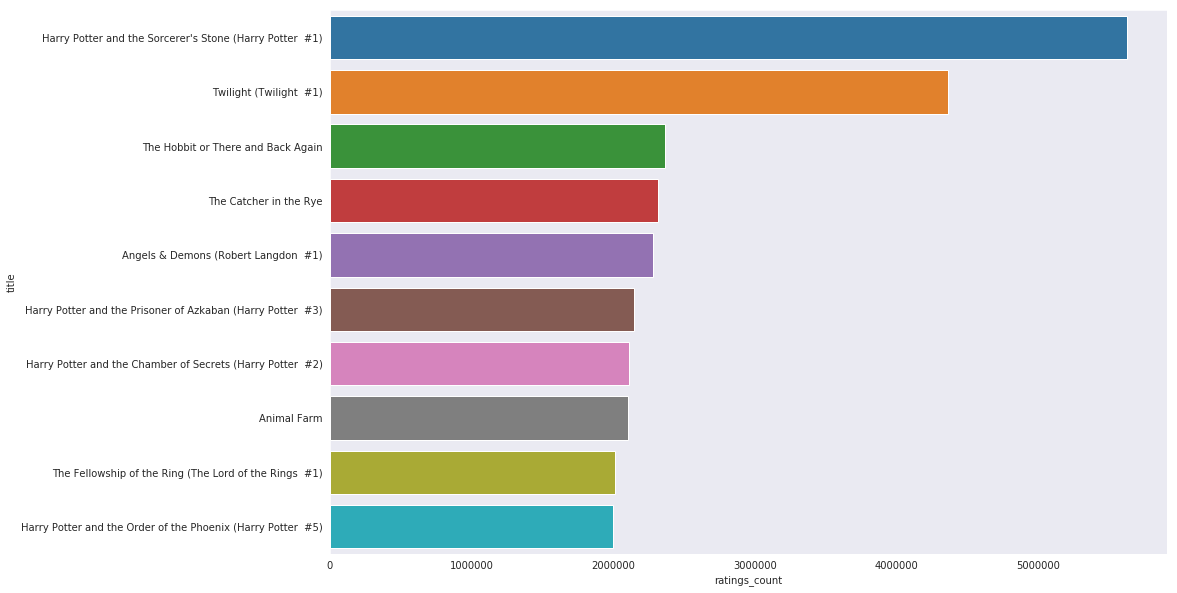

In [9]:
books_with_many_ratings = books_data.sort_values('ratings_count', 
                                                 ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(books_with_many_ratings['ratings_count'], books_with_many_ratings.index )

5. Which are some of the highly rated books?

Before answering question 5, we will see how the ratings of the books are. For example, what is the maximum value, minimum and average?

In [10]:
books_data['average_rating'].describe()

count    13714.000000
mean         3.930620
std          0.357893
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

Let's define the rating as HIGH if rating > 4.5.

In [11]:
top_rated_books = books_data[books_data['average_rating'] > 4.5]
print('Number of top-rated books = ', top_rated_books.shape[0])
print('Top rated books are: ', top_rated_books['title'])

Number of top-rated books =  243
Top rated books are:  bookID
1        Harry Potter and the Half-Blood Prince (Harry ...
5        Harry Potter and the Prisoner of Azkaban (Harr...
8        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
10            Harry Potter Collection (Harry Potter  #1-6)
30       J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
                               ...                        
47532    Harry Potter y el prisionero de Azkaban (Harry...
47538    Harry Potter et le Prisonnier d'Azkaban (Harry...
47615        The Abhorsen Trilogy Box Set (Abhorsen  #1-3)
47631    The Abhorsen Trilogy (The Abhorsen Trilogy  #1-3)
47697                          The Sandman: King of Dreams
Name: title, Length: 243, dtype: object


Ok, the results indicate that Harry Potter books have the highest rating. Let's see the top 5 rated books.

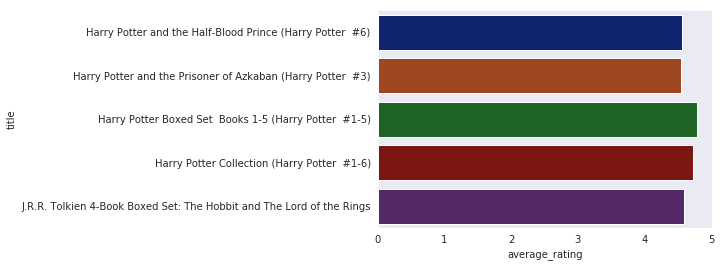

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(y = top_rated_books['title'][:5], 
            x = top_rated_books['average_rating'][:5], palette = 'dark')
plt.show()

In order to answer the 6th question: which authors are the most popular?

The answer to this question requires the use of the average_rating column. In fact, this question can be answered from the previous question's answer.

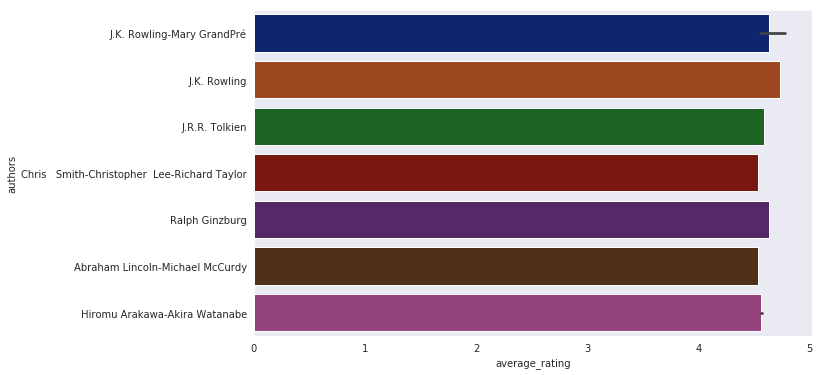

In [13]:
plt.figure(figsize=(10, 6))
sns.set_style("dark")
sns.barplot(y = top_rated_books['authors'][:10], 
            x = top_rated_books['average_rating'][:10], palette = 'dark')
plt.show()

## Answering deep questions.

Now we move on to more involved questions.

1. Does language of the book have any relationship with the ratings it receives?

The rating of the book is given by the column 'average_rating', which has minimum value of 0 and maximum vlue of 5. It can be treated as a continuous variable.

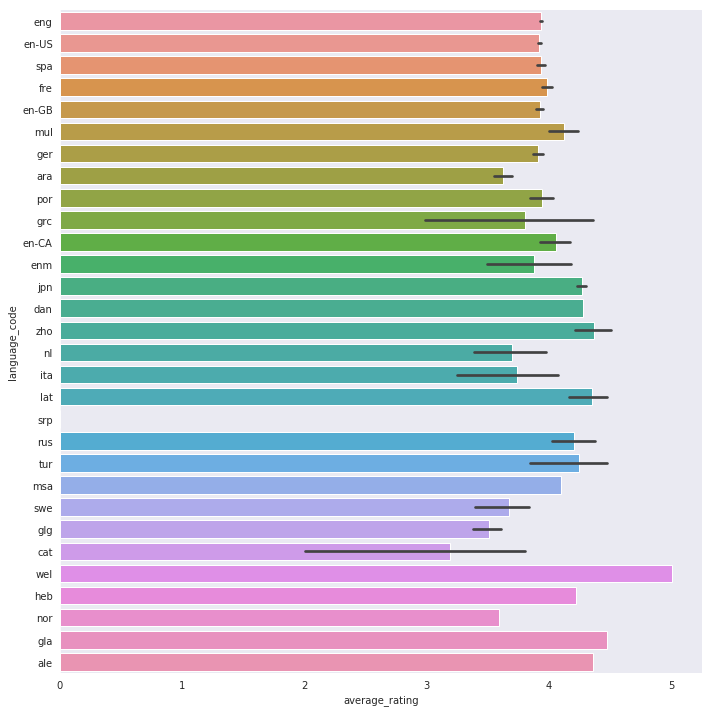

In [14]:
sns.catplot(x = 'average_rating', y = 'language_code', 
            kind = 'bar', data = books_data, height = 10)
plt.show()

It appears as though books written in the wel (Welsh) language tend to have the highest rating. Let's examine the data.

In [15]:
books_data[books_data['language_code'] == 'wel']

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans-Rhonda Evans,5.0,0862431352,9780862431358,wel,150,1,0


Well, there appears to be just one welsh book with one rating in our dataset! So our inference that books written in Welsh tend to have high rating is not the absolute truth. This book could very well be an anomaly.

In [16]:
books_data['ratings_count'].describe()

count    1.371400e+04
mean     1.776540e+04
std      1.129572e+05
min      0.000000e+00
25%      8.300000e+01
50%      6.305000e+02
75%      4.742250e+03
max      5.629932e+06
Name: ratings_count, dtype: float64

In [17]:
mean_ratings_count = books_data['ratings_count'].describe()[1]

In [18]:
books_data_with_sufficient_ratings = books_data[books_data['ratings_count'] >= mean_ratings_count]

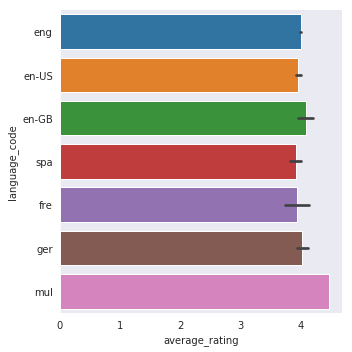

In [19]:
sns.catplot(x = 'average_rating', y = 'language_code'
            , kind = 'bar', data = books_data_with_sufficient_ratings, height = 5)
plt.show()

The language_code of 'mul' stands for Multilingual content (includes at least two languages in separatable parts).

Thus, for languages like English, German, French, Spanish and mul, the average ratings can be expected to high. As these languages are some of the most common languages spoken in the world, this observation is not too surprising.

Now let's look at the languages with the least rating.

In [20]:
mean_rating = books_data_with_sufficient_ratings['average_rating'].describe()[1]

In [21]:
books_with_low_rating = books_data_with_sufficient_ratings[
    books_data_with_sufficient_ratings['average_rating'] < mean_rating]

In [22]:
books_with_low_rating.head()

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
25,I'm a Stranger Here Myself: Notes on Returning...,Bill Bryson,3.90,076790382X,9780767903820,eng,304,47490,2153
26,The Lost Continent: Travels in Small Town America,Bill Bryson,3.83,0060920084,9780060920081,en-US,299,43779,2146
27,Neither Here nor There: Travels in Europe,Bill Bryson,3.87,0380713802,9780380713806,eng,254,46397,2127
28,Notes from a Small Island,Bill Bryson,3.92,0380727501,9780380727506,eng,324,76476,3159
29,The Mother Tongue: English and How It Got That...,Bill Bryson,3.94,0380715430,9780380715435,eng,270,26672,1986


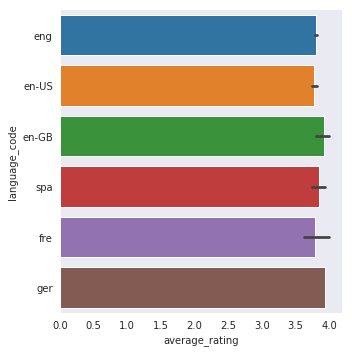

In [23]:
sns.catplot(x = 'average_rating', y = 'language_code',
            kind = 'bar', data = books_with_low_rating, height = 5)
plt.show()

The languages like English, Spanish, German and French, which by the previous plot showed to be highly rated now appear to have low ratings too. Interestingly, the 'mul' category does not appear in this new plot, which shows that books with multi-lingual content tend not to have low ratings. This result just throws the previous result out of the window. So we can conclude that bad ratings are not language dependent.

2. What does the average rating(s) of a particular author's work(s) tell us?

For this analysis, we will consider the author Charles Dickens. First let's see how many books of his we have in our dataset.

In [24]:
books_data[books_data['authors'] == 'Charles Dickens'].shape[0]

11

In [25]:
books_data[books_data['authors'] == 'Charles Dickens'][:3]

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1952,A Tale of Two Cities,Charles Dickens,3.83,0486406512,9780486406510,eng,293,901,74
1982,Charles Dickens: Four Novels: Great Expectati...,Charles Dickens,4.29,0517093391,9780517093399,en-US,848,31,2
5328,A Christmas Carol,Charles Dickens,4.04,1580495796,9781580495790,eng,112,6415,444


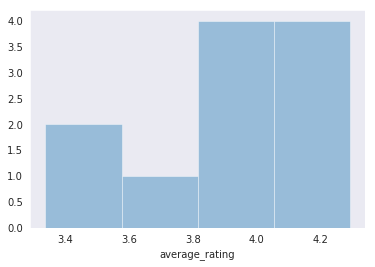

In [26]:
sns.distplot(a = books_data[books_data['authors'] == 'Charles Dickens']['average_rating'], kde = False)
plt.show()

Most of books have an average rating of 4.0 and above, but none have 5. Does this mean that his works are not popular? No, this graph does not give us the full picture. For instance the book with isbn: [0486406512](https://www.goodreads.com/book/show/1952.A_Tale_of_Two_Cities) was published in the year 1999. But the novel itself was originally published in 1859. Our dataset contains reviews for a limited and considerably shorter period of time.

Now lets look at a modern author like J.K. Rowling.

In [27]:
books_data[books_data['authors'] == 'J.K. Rowling'][:3]

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
2002,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,043932162X,9780439321624,eng,240,11459,143


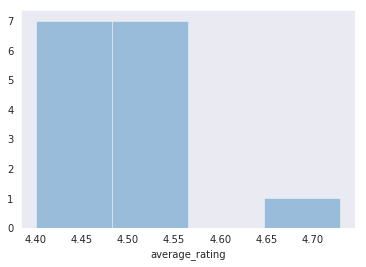

In [28]:
sns.distplot(a = books_data[books_data['authors'] == 'J.K. Rowling']['average_rating'], kde = False)
plt.show()

Now, majority of her books appear to have average rating above 4.4. This fact indicates that her books are more popular than those of Charles Dickens, but let's consider the time component. Consider her book with isbn:[0439554896](https://www.goodreads.com/book/show/4.Harry_Potter_and_the_Chamber_of_Secrets), which was published in 2003. This is a relatively newer book and the ratings would be available from a newer audience. It would be not quite fair to say that J.K. Rowling is more popular that Charles Dickens. A more accurate statement would be: J.K. Rowling is more popular than Charles Dickens according to the data available.

3. Is there a relationship between number of pages and ratings?

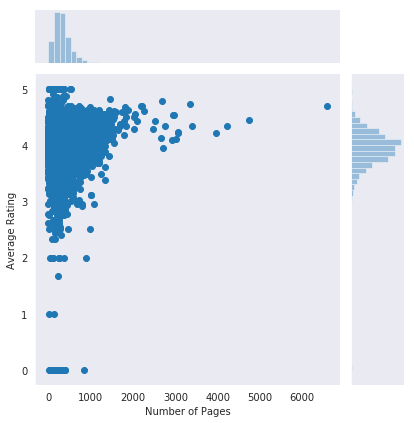

In [29]:
ax = sns.jointplot(x = "# num_pages", y = "average_rating", data = books_data)
ax.set_axis_labels("Number of Pages", "Average Rating")

There appears to be a few observations with rating 0 that have number of pages >= 1000. Let's get rid of them and see the plot again.

In [30]:
books_with_reasonable_num_pages = books_data[books_data['# num_pages'] <= 1000]

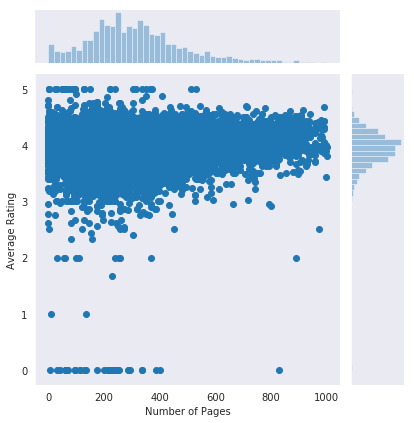

In [31]:
ax = sns.jointplot(x = "# num_pages", y = "average_rating", 
                   data = books_with_reasonable_num_pages)
ax.set_axis_labels("Number of Pages", "Average Rating")

The plot indicates that books with page numbers <= 1000 tend to have higher ratings.

4. Does the number of text reviews that a book has influence the rating of the book?

Logic suggests that if people have something to say about a book, then it is quite likely that there will be an associated rating (high, low or average). Let's see if this is indeed the case.

In [32]:
books_with_no_reviews = books_data[books_data['text_reviews_count'] == 0]
books_with_reviews = books_data[books_data['text_reviews_count'] > 0]

Among books with no text reviews, are there any ratings?

Text(0.5, 1.0, 'Books with no reviews')

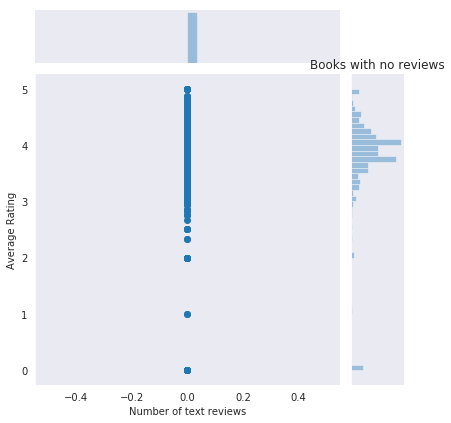

In [33]:
ax = sns.jointplot(x = "text_reviews_count", y = "average_rating", data = books_with_no_reviews)
ax.set_axis_labels("Number of text reviews", "Average Rating")
plt.title('Books with no reviews')

The plot shown above indicates that there can be ratings (high, low, medium) even for books without text reviews. Now let's see how many books satisfy these conditions.

In [34]:
books_with_no_reviews.shape[0]/books_data.shape[0] * 100

6.62826308881435

A mere 6% of the books in the dataset have no reviews and yet have ratings. Next, let's look at the ratings of books with reviews.

Text(0.5, 1.0, 'Books with reviews')

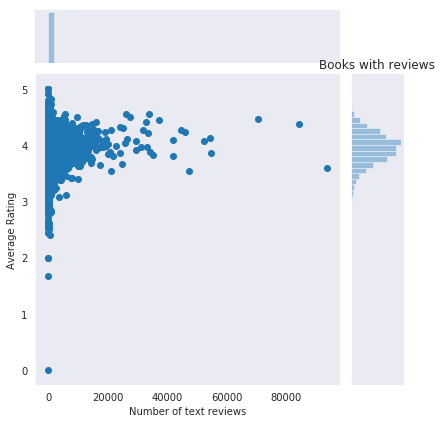

In [35]:
ax = sns.jointplot(x = "text_reviews_count", y = "average_rating", data = books_with_reviews)
ax.set_axis_labels("Number of text reviews", "Average Rating")
plt.title('Books with reviews')

In [36]:
books_with_reviews.shape[0]/books_data.shape[0] * 100

93.37173691118565

This plot shows that for non-zero number of reviews, the ratings can be high, low or medium. Besides, this category of books are high in number, occupying a 93% of the whole dataset. An interesting observation from the plot shown above is that books with more than 2000 reviews tend to have rating more than 3.0.

The conclusion is that the presence of a large number of text reviews indicates the presence of an above average rating (>3.0), whereas the absence of reviews do not necessarily mean a bad/good rating.

## Fun stuff

1. You want to recommend a book to a lazy friend who cannot bother with reading a 500 pages long book. In addition, you want to encourage him/her to read more books. So you better recommend something good and popular.

In [37]:
books_with_atmost_200_pages = books_data[books_data['# num_pages'] <= 200]
best_books_with_atmost_200_pages = books_with_atmost_200_pages.nlargest(10, ['ratings_count'])

Text(0.5, 1.0, 'Top 10 books with <=200 pages')

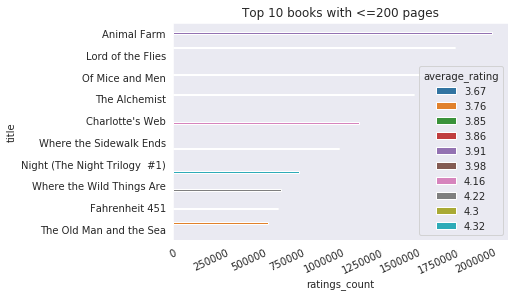

In [38]:
sns.barplot(best_books_with_atmost_200_pages['ratings_count'],
            best_books_with_atmost_200_pages['title'], 
            hue = best_books_with_atmost_200_pages['average_rating'])
plt.xticks(rotation=25)
plt.title('Top 10 books with <=200 pages')

So, we can use the above plot to make our recommendation. But make sure the genre agrees with your friend!

2. You are going on a long and boring train journey and you need to pass the time pleasantly. So you are looking for a book that is long, but popular.

In [39]:
big_books = books_data[books_data['# num_pages'] >= 1000]
best_big_books = big_books.nlargest(10, ['ratings_count'])

Text(0.5, 1.0, 'Top 10 books with more >=1000 pages')

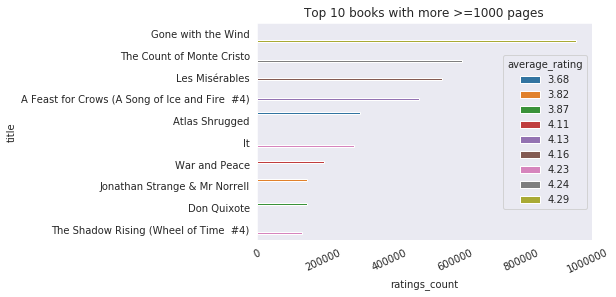

In [40]:
sns.barplot(best_big_books['ratings_count'],
            best_big_books['title'], 
            hue = best_big_books['average_rating'])
plt.xticks(rotation=25)
plt.title('Top 10 books with more >=1000 pages')

## Extra

In this section we will think about what cannot be done with the current form of the dataset. This is interesting because the following points explore the limits of the dataset, which is key to understanding future possibilities.

* Can we make recommendations based on types/genres of books?
 - No, we cannot do this right now because the genre info is missing from the dataset. So, what can we do? We could fetch the genre info corresponding to each book and then add it to the dataset. Using the new dataset, we can make recommendations based on relevant features such as genre, rating, reviews etc.
 
* Can we track the popularity of the books over time?
    - This is not possible with the current dataset because there is no time information in it right? Its partly true. Its true that there is no direct date of publishing in the dataset, but we have the isbn number which can be used to track down the date of publishing. So what about popularity? We can measure popularity using the average_ratings column. By using this column, number of reviews and the date of publishing we can get a rough idea of how the book's popularity has stood the test of time. For example, if a book published in 1990 has a rating of 4.5 in 2013, then it can be regarded as an all-time favorite. Its true that we might end up missing extreme lows and extreme highs in its history, but we can say with confidence that as of now the book has so and so rating and has a good (or bad) rating when compared to a similar book (of similar age). 

* Are there similarities between authors?
    - Now this question requires author-specific info such as writing style, themes, etc. Incorporating these data into our dataset will help in the analysis of author similarities. 